# Python for Data Analysis

## What is pandas

pandas is an open source Python library for data analysis. Python has always been great for prepping and munging data, but for a long time it's never been great for analysis - you'd usually end up using R or loading it into a database and using SQL (or worse, Excel). 
pandas makes Python great for analysis.

## Pandas data structures

pandas introduces two new data structures to Python - Series and DataFrame, both of which are built on top of NumPy (this means it's fast).

In [1]:
# some imports noqa for now
import pandas as pd
import numpy as np

pd.set_option('max_columns', 50)

### Series

In [2]:
# create a Series 
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'PI'])
s

0              7
1     Heisenberg
2           3.14
3    -1789710578
4             PI
dtype: object

In [3]:
# Alternatively, you can specify an index to use when creating the Series.
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'PI'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s

A              7
Z     Heisenberg
C           3.14
Y    -1789710578
E             PI
dtype: object

In [4]:
# using a dict
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities

Chicago          1000.0
New York         1300.0
Portland          900.0
San Francisco    1100.0
Austin            450.0
Boston              NaN
dtype: float64

In [5]:
# Select
cities['Chicago']

1000.0

In [6]:
cities[['Chicago', 'Portland', 'San Francisco']]

Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64

In [7]:
# Or you can use **boolean indexing** for selection.
bool_idx = cities < 1000
cities[bool_idx]

Portland    900.0
Austin      450.0
dtype: float64

In [8]:
# That last one might be a little weird, so let's make it more clear 
# cities < 1000 returns a Series of True/False values, which we then pass to our Series cities, returning the # corresponding True items.

In [9]:
bool_idx

Chicago          False
New York         False
Portland          True
San Francisco    False
Austin            True
Boston           False
dtype: bool

In [10]:
# changing values
cities[cities < 1000] = -1
cities

Chicago          1000.0
New York         1300.0
Portland           -1.0
San Francisco    1100.0
Austin             -1.0
Boston              NaN
dtype: float64

In [11]:
# operations
cities / 3

Chicago          333.333333
New York         433.333333
Portland          -0.333333
San Francisco    366.666667
Austin            -0.333333
Boston                  NaN
dtype: float64

In [12]:
# index alignment
cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']]

Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64

In [13]:
# na check
cities.isna()

Chicago          False
New York         False
Portland         False
San Francisco    False
Austin           False
Boston            True
dtype: bool

### DataFrame
To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

In [14]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


Much more often, you'll have a dataset you want to read into a DataFrame. Let's go through several common ways of doing so.

### I/O

pandas' various reader functions have many parameters allowing you to do things like skipping lines of the file, parsing dates, or specifying how to handle NA/NULL datapoints.

In [15]:
iris = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [16]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
import sqlite3
# https://codestencil.com/database/chinook-database-schema

conn = sqlite3.connect("data/Chinook_Sqlite.sqlite")
query = "SELECT * FROM Album;"

results = pd.read_sql(query, con=conn)
results.head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3


In [18]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/Pythonidae')
len(dfs) # how many tables in that url
dfs[2]

,Genus[2],Taxon author[2],Species[2],Subsp.[a][2],Common name,Geographic range[1]
0,Antaresia,"Wells & Wellington, 1984",4,2,Children's pythons,Australia in arid and tropical regions
1,Apodora[13],"Kluge, 1993",1,0,Papuan olive python,Papua New Guinea
2,Aspidites,"Peters, 1877",2,0,Shield pythons,Australia except in the south of the country
3,Bothrochilus,"Fitzinger, 1843",1,0,Bismarck ringed python,Bismarck Archipelago
4,Leiopython,"Hubrecht, 1879",2,0,NaN,Papua New Guinea
5,Liasis,"Gray, 1842",3,5,Water pythons,"Indonesia in the Lesser Sunda Islands, east th..."
6,Malayopython,"Reynolds, 2014",2,3,Reticulated and Timor pythons,From India to Timor
7,Morelia,"Gray, 1842",8,6,Tree pythons,"From Indonesia in the Maluku Islands, east thr..."
8,Nawaran,"Donnellan, Brennan, Lemmon, Moriarty Lemmon, Z...",4,0,Oenpelli python,"Northern Territory,Australia"
9,Python[b],"Daudin, 1803",10,2,"""True"" pythons",Africa in the tropics south of the Sahara (not...


## More on for DataFrames

Pandas has an ABUNDANCE of functionality, far more that can be covered today. The [documentation](https://pandas.pydata.org/pandas-docs/stable/)
We'll be using the MovieLens dataset in many examples going forward. Check out the Readme file for more detail on the data. 

In [19]:
movies = pd.read_csv("data/ml-latest-small/movies.csv")

### Inspection

In [20]:
# try tail and sample also
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [21]:
movies.shape

(9742, 3)

In [22]:
# Dataframe instance, dtypes. mem and nulls
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [23]:
# descriptive stats 
movies.describe(include='all')

,movieId,title,genres
count,9742.000000,9742,9742
unique,NaN,9737,951
top,NaN,Saturn 3 (1980),Drama
freq,NaN,2,1053
mean,42200.353623,NaN,NaN
std,52160.494854,NaN,NaN
min,1.000000,NaN,NaN
25%,3248.250000,NaN,NaN
50%,7300.000000,NaN,NaN
75%,76232.000000,NaN,NaN


### Selecting

You can think of a DataFrame as a group of Series that share an index (in this case the column headers). This makes it easy to select specific columns.

In [24]:
movies['title'].sample(4)

5249                               Our Hospitality (1923)
7648                                       One Day (2011)
6165    Lives of Others, The (Das leben der Anderen) (...
1808                            Cocoon: The Return (1988)
Name: title, dtype: object

In [25]:
movies[['title', 'genres']].tail()

,title,genres
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation
9741,Andrew Dice Clay: Dice Rules (1991),Comedy


In [26]:
# boolean series
cond_comedy = movies['genres'].str.contains('Comedy')
cond_comedy

0        True
1       False
2        True
3        True
4        True
        ...  
9737     True
9738     True
9739    False
9740    False
9741     True
Name: genres, Length: 9742, dtype: bool

In [27]:
movies[cond_comedy].sample(5)

,movieId,title,genres
3194,4306,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...
7094,70334,Hannah Montana: The Movie (2009),Comedy|Drama|Musical|Romance
5394,8989,Damn Yankees! (1958),Comedy|Musical
5751,30898,"Upside of Anger, The (2005)",Comedy|Drama|Romance
2654,3552,Caddyshack (1980),Comedy


In [28]:
# indexing
movies.index # pandas free index if not specified

RangeIndex(start=0, stop=9742, step=1)

In [29]:
# let's set a relevant index
movies = movies.set_index('movieId')
movies.sample(3)

,title,genres
movieId,,
7162,Cold Mountain (2003),Drama|Romance|War
7307,Flesh & Blood (1985),Action|Adventure|Drama|War
6827,It's Pat (1994),Comedy


In [30]:
movies[(movies.index > 100) & (movies.index < 102)]

,title,genres
movieId,,
101,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance


The simplified rules of indexing are

- Use loc for label-based indexing
- Use iloc for positional indexing


In [31]:
# loc vs iloc
movies.loc[101]

title               Bottle Rocket (1996)
genres    Adventure|Comedy|Crime|Romance
Name: 101, dtype: object

In [32]:
movies.iloc[101] # show cols indxing

title     Anne Frank Remembered (1995)
genres                     Documentary
Name: 116, dtype: object

In [33]:
movies.loc[101, 'genres']

'Adventure|Comedy|Crime|Romance'

In [34]:
movies.iloc[101, 0:1]

title    Anne Frank Remembered (1995)
Name: 116, dtype: object

In [35]:
# simple regex
movies.loc[movies['title'].str.contains(pat= '\(198[0-9]\)', regex=True), ['title','genres']]

,title,genres
movieId,,
541,Blade Runner (1982),Action|Sci-Fi|Thriller
592,Batman (1989),Action|Crime|Thriller
610,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
709,Oliver & Company (1988),Adventure|Animation|Children|Comedy|Musical
921,My Favorite Year (1982),Comedy
...,...,...
175397,"In the blue sea, in the white foam. (1984)",Animation|Children|Fantasy
175401,Wolf and Calf (1984),Animation
175435,The Magic Ring (1982),Animation|Fantasy


### Joining

Like SQL's JOIN clause, pandas.merge allows two DataFrames to be joined on one or more keys. The function provides a series of parameters (on, left_on, right_on, left_index, right_index) allowing you to specify the columns or indexes on which to join.

By default, pandas.merge operates as an inner join, which can be changed using the how parameter.

From the function's docstring:

    **how : {'left', 'right', 'outer', 'inner'}, default 'inner'**

        left: use only keys from left frame (SQL: left outer join)

        right: use only keys from right frame (SQL: right outer join)

        outer: use union of keys from both frames (SQL: full outer join)

        inner: use intersection of keys from both frames (SQL: inner join)





In [36]:
left_frame = pd.DataFrame({'key': range(5), 
                           'left_value': ['a', 'b', 'c', 'd', 'e']})
right_frame = pd.DataFrame({'key': range(2, 7), 
                           'right_value': ['f', 'g', 'h', 'i', 'j']})
print(left_frame)
print('\n')
print(right_frame)

   key left_value
0    0          a
1    1          b
2    2          c
3    3          d
4    4          e


   key right_value
0    2           f
1    3           g
2    4           h
3    5           i
4    6           j


In [37]:
pd.merge(left_frame, right_frame, on='key', how='left')

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,f
3,3,d,g
4,4,e,h


In [38]:
"""
SELECT left_frame.key, left_frame.left_value, right_frame.right_value
FROM left_frame
LEFT JOIN right_frame
    ON left_frame.key = right_frame.key;
"""

'\nSELECT left_frame.key, left_frame.left_value, right_frame.right_value\nFROM left_frame\nLEFT JOIN right_frame\n    ON left_frame.key = right_frame.key;\n'

If the cols names were different not an issue! we could have used the left_on and right_on parameters to specify which fields to join from each frame.

In [39]:
right_frame = right_frame.set_index('key')

In [40]:
# key coudl be on an index 
pd.merge(left_frame, right_frame, left_on='key', right_index=True, how='outer')

,key,left_value,right_value
0.0,0,a,NaN
1.0,1,b,NaN
2.0,2,c,f
3.0,3,d,g
4.0,4,e,h
NaN,5,NaN,i
NaN,6,NaN,j


In [41]:
# you can also use Join
# i recommed using join if you are new to pandas
right_frame.join(left_frame.set_index('key'), how='outer')
right_frame = right_frame.reset_index()

### Combining

pandas also provides a way to combine DataFrames along an axis - pandas.concat.
Pandas concat is the swiss army knife for merging. 

pandas.concat takes a list of Series or DataFrames and returns a Series or DataFrame of the concatenated objects. Note that because the function takes list, you can combine many objects at once.

In [42]:
# axis 0 means along the columns  (vertically appended)
# note it alligns all fields by collumn name
pd.concat([left_frame, right_frame], axis=0)

,key,left_value,right_value
0,0,a,NaN
1,1,b,NaN
2,2,c,NaN
3,3,d,NaN
4,4,e,NaN
0,2,NaN,f
1,3,NaN,g
2,4,NaN,h
3,5,NaN,i
4,6,NaN,j


In [43]:
# axis 1 means along rows (side-by-side)
# note it alligns all fields by index name (numbers in this case)
pd.concat([left_frame, right_frame], axis=1)

,key,left_value,key,right_value
0,0,a,2,f
1,1,b,3,g
2,2,c,4,h
3,3,d,5,i
4,4,e,6,j


### Grouping

pandas groupby method is inspired largely from the split-apply-combine strategy for data analysis. If you're not familiar with this methodology, I highly suggest you read up on it. It does a great job of illustrating how to properly think through a data problem, which I feel is more important than any technical skill a data analyst/scientist can possess

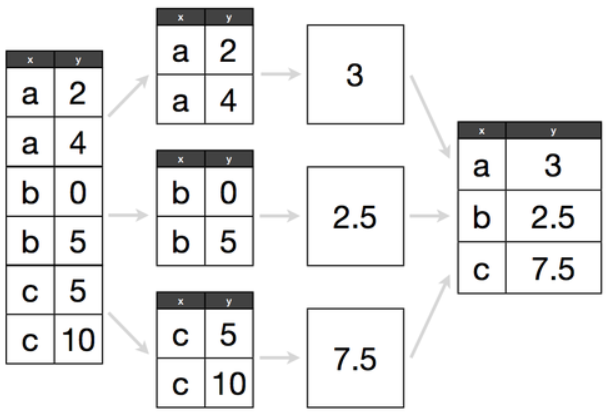

In [44]:
# example
headers = ['name', 'title', 
           'department', 'salary']
chicago = pd.read_csv("https://raw.githubusercontent.com/gjreda/gregreda.com/master/content/notebooks/data/city-of-chicago-salaries.csv", 
                     names = headers,
                     header = 0)
chicago.sample(3)

,name,title,department,salary
13264,"JACHIM, THOMAS M",LINEMAN,TRANSPORTN,$93288.00
30700,"WHITE, VERNA J",FOSTER GRANDPARENT,FAMILY & SUPPORT,$2756.00
1965,"BERGGREN, KEITH J",POLICE OFFICER,POLICE,$80724.00


In [45]:
chicago['salary'] = chicago['salary'].str.replace("$", "").astype('float')
chicago.sample(3)

,name,title,department,salary
21327,"ORMISTE, ULO A",CHIEF PROGRAMMER/ANALYST,DoIT,110352.0
1917,"BENNETT, BARBARA M",SUPERVISING INVESTIGATOR,FIRE,77280.0
26243,"SHEBISH, THOMAS R",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,90540.0


In [46]:
by_dept = chicago.groupby('department')
by_dept

In [47]:
# how many in each 
by_dept.count().head() # not nulls count per col

,name,title,salary
department,,,
ADMIN HEARNG,42,42,42
ANIMAL CONTRL,61,61,61
AVIATION,1218,1218,1218
BOARD OF ELECTION,110,110,110
BOARD OF ETHICS,9,9,9


In [48]:
by_dept.mean().head()

,salary
department,
ADMIN HEARNG,70336.857143
ANIMAL CONTRL,57121.455738
AVIATION,70638.249130
BOARD OF ELECTION,55728.872727
BOARD OF ETHICS,81650.666667


In [49]:
by_dept.median().head()

,salary
department,
ADMIN HEARNG,63456.0
ANIMAL CONTRL,55212.0
AVIATION,70408.0
BOARD OF ELECTION,49236.0
BOARD OF ETHICS,75240.0


In [50]:
# top 10 unique job title counts per department
by_dept['title'].nunique().sort_values(ascending=False)[:5]

department
WATER MGMNT    153
TRANSPORTN     150
POLICE         130
AVIATION       125
HEALTH         118
Name: title, dtype: int64

In [51]:
"""
SELECT department, COUNT(DISTINCT title)
FROM chicago
GROUP BY department
ORDER BY 2 DESC
LIMIT 5;
"""

'\nSELECT department, COUNT(DISTINCT title)\nFROM chicago\nGROUP BY department\nORDER BY 2 DESC\nLIMIT 5;\n'

In [52]:
## What if i need the highest paid member of staf per department
# a split apply combine problem

def ranker(df):
    """Assigns a rank to each employee based on salary, with 1 being the highest paid.
    Assumes the data is DESC sorted."""
    df['dept_rank'] = np.arange(len(df)) + 1 # 0 indexed
    return df

#print(np.arange(10))
#print(np.arange(10)+1)

chicago.sort_values('salary', ascending=False, inplace=True)
chicago = chicago.groupby('department').apply(ranker)

In [53]:
# top paid by dpt
chicago[chicago.dept_rank == 1].sort_values(by='salary', ascending=False).head(10)

,name,title,department,salary,dept_rank
18039,"MC CARTHY, GARRY F",SUPERINTENDENT OF POLICE,POLICE,260004.0,1
8004,"EMANUEL, RAHM",MAYOR,MAYOR'S OFFICE,216210.0,1
25588,"SANTIAGO, JOSE A",FIRE COMMISSIONER,FIRE,202728.0,1
763,"ANDOLINO, ROSEMARIE S",COMMISSIONER OF AVIATION,AVIATION,186576.0,1
4697,"CHOUCAIR, BECHARA N",COMMISSIONER OF HEALTH,HEALTH,177156.0,1
21971,"PATTON, STEPHEN R",CORPORATION COUNSEL,LAW,173664.0,1
12635,"HOLT, ALEXANDRA D",BUDGET DIR,BUDGET & MGMT,169992.0,1
22894,"POWERS, THOMAS H",COMMISSIONER OF WATER MGMT,WATER MGMNT,169512.0,1
15053,"KLEIN, GABRIEL J",COMMISSIONER OF TRANSPORTATION,TRANSPORTN,169500.0,1
25778,"SCHENKEL, GARY W",EXEC DIR EMERG MGMT & COMM,OEMC,167796.0,1


#### More on Movie lens Exploratory DA

- ? What are the 25 most rated movies ?

In [69]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-latest-small/ratings.csv', names=r_cols, header=0,
                      encoding='latin-1')
ratings.shape

(100836, 4)

In [70]:
movies.shape

(9742, 2)

## More resources

There are tomes for free online:

- [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html) great place for recipes 
- [Daniel Chen Scipy 2019 tutorial](https://www.youtube.com/watch?v=5rNu16O3YNE) 

Worth investing in my opinion:
- [Python for Data Analysis](https://www.amazon.co.uk/Python-Data-Analysis-Wes-Mckinney/dp/1491957662)  by Wes McKinney pandas creator/ BDFL hands on guide to pandas and more
